In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import tensorflow as tf
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [15]:
# Load datasets
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Check shape
train.shape, test.shape

((42000, 785), (28000, 784))

In [17]:
# Split label of train
target = train['label'].astype('float32')
train = train.drop('label', axis=1).astype('int32')
test = test.astype('float32')

target.shape, train.shape, test.shape

((42000,), (42000, 784), (28000, 784))

In [20]:
# Train-validation splitting
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((33600, 784), (8400, 784), (33600,), (8400,))

## Logistics Regression

In [28]:
# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/nguyenvietthai/miniconda3/envs/computer-vision/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# Save model
joblib.dump(log_reg, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [30]:
# Predict and score
y_pred = log_reg.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 91.83%


> With the simplest Logistics Regression model, we got a quite good accuracy: 91.83%

## CNN

In [41]:
# Preprocess: Convert to 28x28 pixels array & normalization
X_train = train.values.reshape((train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = test.values.reshape((test.shape[0], 28, 28, 1)).astype('float32') / 255

X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [42]:
# One Hot Encoding to label
y_train = tf.keras.utils.to_categorical(target, 10)

y_train.shape

(42000, 10)

In [43]:
# Train-validation splitting
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

In [45]:
# Define layers 
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [47]:
# Compile and train 
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val)
)

Epoch 1/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.1506 - accuracy: 0.9546 - val_loss: 0.0801 - val_accuracy: 0.9729
Epoch 2/10
1182/1182 [==============================] - 17s 14ms/step - loss: 0.0468 - accuracy: 0.9857 - val_loss: 0.0575 - val_accuracy: 0.9817
Epoch 3/10
1182/1182 [==============================] - 17s 14ms/step - loss: 0.0287 - accuracy: 0.9906 - val_loss: 0.0546 - val_accuracy: 0.9836
Epoch 4/10
1182/1182 [==============================] - 17s 14ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 0.0451 - val_accuracy: 0.9883
Epoch 5/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0143 - accuracy: 0.9949 - val_loss: 0.0430 - val_accuracy: 0.9881
Epoch 6/10
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.0504 - val_accuracy: 0.9886
Epoch 7/10
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0647 -

In [48]:
# Save CNN model
joblib.dump(model, 'cnn.joblib')

['cnn.joblib']

> Here the accuracy is 99.80%. We have comparison for Accuracy:
> - (Baseline) Logistics Regression: 91.83%
> - CNN: 99.80%

In [9]:
# Predict and select the result with maximum probability
results = model.predict(X_test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name='Label')

results

875/875 [==============================] - 4s 4ms/step


0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

1/1 [==============================] - 0s 12ms/step
Predicted value: 6


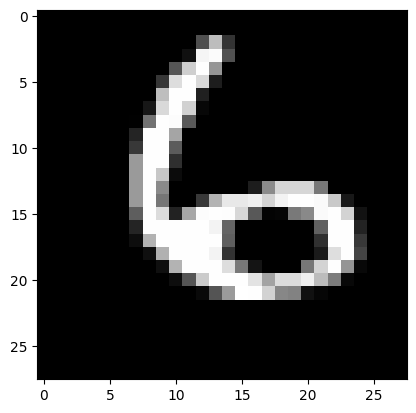

In [13]:
# Test and show image result
ran_num = rd.randrange(len(X_test))
plt.imshow(X_test[ran_num].reshape(28, 28), cmap='gray')

y_pred = model.predict(X_test[ran_num].reshape(1, 28, 28, 1))
print(f'Predicted value: {np.argmax(y_pred)}')